# Read data from realpage

In [19]:
# %pip install matplotlib pandas requests

In [13]:
import requests
import pandas as pd

In [5]:
# Format for getting market info
markets_url = 'https://www.realpage.com/explore/assets/da-markets.json'
#
markets_list = requests.get(markets_url)
# markets_list.json() # Enumerates all
# Denver's market id is 19740

In [9]:
market_id = 19740 
properties_url = f"https://dac.realpage.com/dac/markets/{market_id}/properties"
properties_list = requests.get(properties_url)

In [10]:
properties_list.json()

[{'propertyId': 7971,
  'propertyName': 'Copperwood Apartments',
  'zipCode': '80003',
  'address': '8200 Sheridan Boulevard',
  'city': 'Westminster',
  'state': 'CO',
  'averageSquareFootage': 650,
  'stories': '2',
  'stable': 'stable',
  'class': 'B',
  'latitude': '39.846088',
  'longitude': '-105.050888',
  'imageHero': '/80/80/hero_565b36.jpg',
  'heroSource': 'RealPage',
  'submarketName': 'Arvada/Golden',
  'unitcount': 360,
  'yearBuilt': '1971',
  'metricData': [{'metricCode': 'MPF-ANN-RENT-CHG',
    'metricValue': 0.0458,
    'metricValueFormatted': '4.58%'},
   {'metricCode': 'MPF-RPSF',
    'metricValue': 2.302,
    'metricValueFormatted': '$2.302'},
   {'metricCode': 'MPF-RENT',
    'metricValue': 1497,
    'metricValueFormatted': '$1,497'},
   {'metricCode': 'MPF-OCC',
    'metricValue': 0.95,
    'metricValueFormatted': '95.0%'},
   {'metricCode': 'MPF-HIST-CONC-RATIO',
    'metricValue': None,
    'metricValueFormatted': None},
   {'metricCode': 'MPF-HIST-AVG-ASK-RPSF

In [11]:
len(properties_list.json())

825

In [14]:
# Iterate and 
rp_properties_df = pd.DataFrame(properties_list.json())

In [15]:
rp_properties_df.dtypes

propertyId               int64
propertyName            object
zipCode                 object
address                 object
city                    object
state                   object
averageSquareFootage     int64
stories                 object
stable                  object
class                   object
latitude                object
longitude               object
imageHero               object
heroSource              object
submarketName           object
unitcount                int64
yearBuilt               object
metricData              object
dtype: object

In [33]:
rp_properties_df.iloc[0]#['metricData']

propertyId                                                           7971
propertyName                                        Copperwood Apartments
zipCode                                                             80003
address                                           8200 Sheridan Boulevard
city                                                          Westminster
state                                                                  CO
averageSquareFootage                                                  650
stories                                                                 2
stable                                                             stable
class                                                                   B
latitude                                                        39.846088
longitude                                                     -105.050888
imageHero                                          /80/80/hero_565b36.jpg
heroSource                            

In [16]:
rp_properties_df[['averageSquareFootage', 'unitcount']].describe()

,averageSquareFootage,unitcount
count,825.000000,825.000000
mean,858.210909,248.783030
std,155.880296,139.173323
min,365.000000,10.000000
25%,767.000000,148.000000
50%,864.000000,239.000000
75%,942.000000,322.000000
max,1798.000000,1519.000000


stories
1       5
2     138
3     359
4     114
5      90
6      26
7      17
8      22
9       5
10      3
11      6
12     10
13      6
14      6
15      3
16      3
17      1
18      1
19      1
21      2
24      1
25      1
28      1
31      1
32      1
35      1
37      1
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

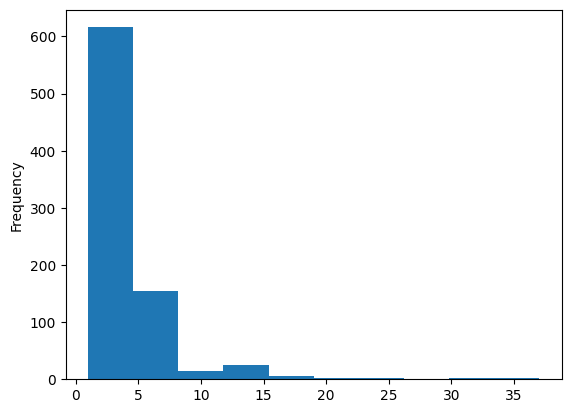

In [28]:
# Number of stories
print(rp_properties_df['stories'].astype(int).value_counts(dropna=False).sort_index())
rp_properties_df['stories'].astype(int).plot.hist()

In [29]:
# Property class typers
print(rp_properties_df['class'].value_counts(dropna=False).sort_index())
# rp_properties_df['class'].astype(int).plot.hist()

class
A       185
B       410
C       229
None      1
Name: count, dtype: int64


yearBuilt
1909     1
1924     1
1933     1
1935     2
1940     1
        ..
2018    47
2019    34
2020    40
2021    23
2022    24
Name: count, Length: 70, dtype: int64


<Axes: ylabel='Frequency'>

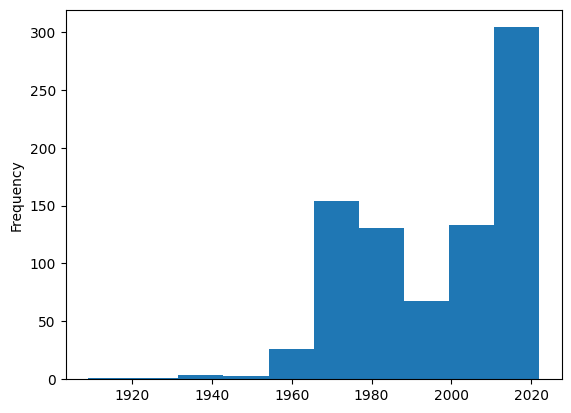

In [30]:
# Year Built
print(rp_properties_df['yearBuilt'].astype(int).value_counts(dropna=False).sort_index())
rp_properties_df['yearBuilt'].astype(int).plot.hist()

unitcount
10      1
12      2
21      1
23      2
24      2
       ..
710     1
727     1
760     1
959     1
1519    1
Name: count, Length: 358, dtype: int64


<Axes: ylabel='Frequency'>

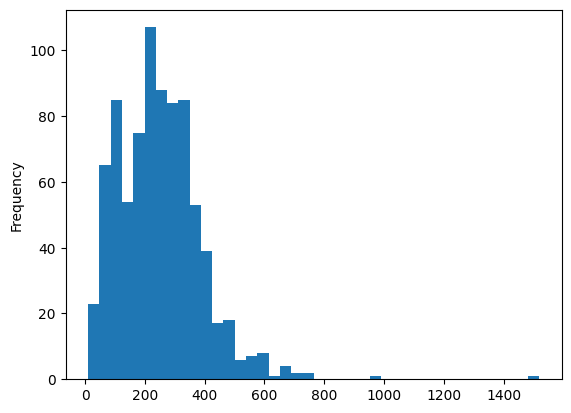

In [35]:
# Units
print(rp_properties_df['unitcount'].astype(int).value_counts(dropna=False).sort_index())
rp_properties_df['unitcount'].astype(int).plot.hist(bins=40)